In [2]:
import numpy as np
import pandas as pd
from functools import reduce


In [3]:
df_index=pd.read_excel('data/CSUSHPINSA wb.xlsx')
df_market=pd.read_excel('data/NASDAQ100 wb.xlsx')
df_pop=pd.read_excel('data/POPTHM wb.xlsx')
df_construction=pd.read_excel('data/WPUSI012011 wb.xlsx')
df_unemp=pd.read_excel('data/UNRATE wb.xlsx')
df_interest=pd.read_excel('data/BOGZ1FL075035503Q wb.xlsx')
df_mortgage=pd.read_excel('data/MORTGAGE30US wb.xlsx')
df_percapinc=pd.read_excel('data/percapinc.xls')
df_hunits=pd.read_excel('data/houseunits.xls')

In [4]:
data=[df_market,df_pop,df_construction,df_unemp,df_interest,df_mortgage,df_percapinc,df_hunits]

In [5]:
for dataset in data:
    print(dataset.shape)

(90, 2)
(90, 2)
(90, 2)
(90, 2)
(90, 2)
(90, 2)
(90, 2)
(90, 2)


In [6]:
for dataset in data:
    print(dataset.columns)

Index(['Quarter', 'NASDAQ100'], dtype='object')
Index(['Quarter', 'POPTHM'], dtype='object')
Index(['Quarter', 'WPUSI012011'], dtype='object')
Index(['Quarter', 'UNRATE'], dtype='object')
Index(['Quarter', 'Interest_rate'], dtype='object')
Index(['Quarter', 'MORTGAGE30US'], dtype='object')
Index(['Quarter', 'percapinc'], dtype='object')
Index(['Quarter', 'housunits'], dtype='object')


In [7]:
dfs = [df_index,df_market, df_interest, df_construction,df_mortgage,df_pop,df_unemp,df_percapinc,df_hunits]

#merge all DataFrames into one
df = reduce(lambda  left,right: pd.merge(left,right,on=['Quarter'],
                                            how='outer'), dfs)

In [8]:
df.head()

,Quarter,CSUSHPINSA,NASDAQ100,Interest_rate,WPUSI012011,MORTGAGE30US,POPTHM,UNRATE,percapinc,housunits
0,2000 Q1,100.679000,4046.825397,127696,144.733333,8.256923,281304.333333,4.033333,30015,115999
1,2000 Q2,103.698667,3629.497460,126924,145.166667,8.316154,282002.000000,3.933333,30447,116047
2,2000 Q3,106.459000,3779.890000,139947,143.833333,8.020000,282768.666667,4.000000,30933,116482
3,2000 Q4,108.270000,2941.222857,144433,142.833333,7.620769,283518.666667,3.900000,31206,116914
4,2001 Q1,109.749333,2168.620952,143811,142.266667,7.006923,284168.666667,4.233333,31704,117347


In [9]:
df.rename(columns={'CSUSHPINSA':'Index','WPUSI012011':'cons_mat'})

,Quarter,Index,NASDAQ100,Interest_rate,cons_mat,MORTGAGE30US,POPTHM,UNRATE,percapinc,housunits
0,2000 Q1,100.679000,4046.825397,127696,144.733333,8.256923,281304.333333,4.033333,30015,115999
1,2000 Q2,103.698667,3629.497460,126924,145.166667,8.316154,282002.000000,3.933333,30447,116047
2,2000 Q3,106.459000,3779.890000,139947,143.833333,8.020000,282768.666667,4.000000,30933,116482
3,2000 Q4,108.270000,2941.222857,144433,142.833333,7.620769,283518.666667,3.900000,31206,116914
4,2001 Q1,109.749333,2168.620952,143811,142.266667,7.006923,284168.666667,4.233333,31704,117347
...,...,...,...,...,...,...,...,...,...,...
85,2021 Q2,255.562000,13797.364762,320999,304.466667,3.003846,332021.000000,5.900000,62255,141928
86,2021 Q3,268.652333,15113.542812,337230,314.587000,2.872143,332296.666667,5.100000,62666,142265
87,2021 Q4,276.157000,15843.419219,351927,328.697333,3.079231,332583.666667,4.233333,63172,142602
88,2022 Q1,288.006000,14576.935968,355629,345.059000,3.822308,332748.666667,3.800000,63884,142939


In [10]:
df.shape

(90, 10)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Quarter        90 non-null     object 
 1   CSUSHPINSA     90 non-null     float64
 2   NASDAQ100      90 non-null     float64
 3   Interest_rate  90 non-null     int64  
 4   WPUSI012011    90 non-null     float64
 5   MORTGAGE30US   90 non-null     float64
 6   POPTHM         90 non-null     float64
 7   UNRATE         90 non-null     float64
 8   percapinc      90 non-null     int64  
 9   housunits      90 non-null     int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 7.7+ KB


In [12]:
df.describe(include="all")

,Quarter,CSUSHPINSA,NASDAQ100,Interest_rate,WPUSI012011,MORTGAGE30US,POPTHM,UNRATE,percapinc,housunits
count,90,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
unique,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2000 Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,169.041648,4100.429369,216455.144444,200.884230,4.985707,310426.674074,5.907778,43948.422222,131018.711111
std,NaN,41.061039,3610.055121,58960.683183,43.961087,1.359509,16100.877054,1.945230,9592.375626,7457.081105
min,NaN,100.679000,945.332813,126924.000000,142.033333,2.760714,281304.333333,3.600000,30015.000000,115999.000000
25%,NaN,141.962583,1633.297222,169301.500000,170.400000,3.887349,296526.666667,4.500000,36193.750000,125740.250000
50%,NaN,165.653000,2588.831357,212705.500000,201.950000,4.717692,311658.333333,5.433333,42444.500000,132178.000000
75%,NaN,184.360417,4814.456295,254024.000000,215.683333,6.084038,325399.333333,6.841667,50013.500000,136487.750000


In [13]:
#Finding correlation
df.corr()['CSUSHPINSA'].sort_values(ascending=False)

CSUSHPINSA       1.000000
Interest_rate    0.956532
WPUSI012011      0.896744
percapinc        0.877490
NASDAQ100        0.849974
housunits        0.814834
POPTHM           0.771812
UNRATE          -0.262429
MORTGAGE30US    -0.583233
Name: CSUSHPINSA, dtype: float64

In [14]:
#No missing values
df.isnull().sum()

Quarter          0
CSUSHPINSA       0
NASDAQ100        0
Interest_rate    0
WPUSI012011      0
MORTGAGE30US     0
POPTHM           0
UNRATE           0
percapinc        0
housunits        0
dtype: int64

In [15]:
df.to_excel('data/data.xlsx',index=False)

In [16]:
x=df.drop(["CSUSHPINSA","Quarter"],axis=True)
y=df["CSUSHPINSA"]

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt



In [18]:
#training random forest model
reg = RandomForestRegressor(n_estimators=100)
reg.fit(x,y)

RandomForestRegressor()

In [19]:
#feature importance
df_feature_importance = pd.DataFrame(reg.feature_importances_, index=x.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
Interest_rate,0.352454
housunits,0.168570
WPUSI012011,0.147106
POPTHM,0.116221
NASDAQ100,0.084439
percapinc,0.079480
UNRATE,0.038171
MORTGAGE30US,0.013558


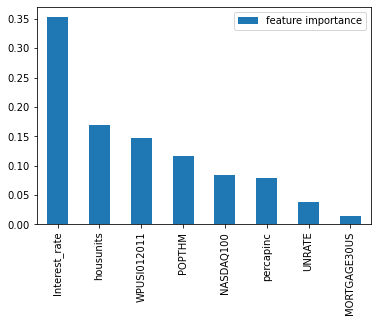

In [20]:
df_feature_importance.plot(kind='bar');

In [21]:
#training xgboost regressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [23]:
xgbregressor=xgb.XGBRegressor(eval_metric='rmsle')

In [24]:
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(xgbregressor, param_grid, cv=5).fit(x,y)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 600}


In [26]:
xgbregressor=xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmsle')

xgbregressor.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmsle', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.015, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=600, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

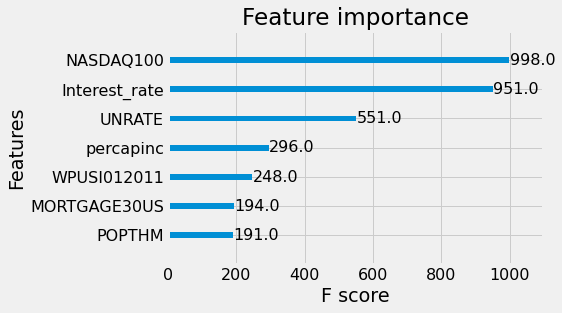

In [31]:
from xgboost import plot_importance
import matplotlib.pyplot as plt


plot_importance(xgbregressor)
plt.show()

In [36]:
smita="89"
kasturi=int(smita)
type(kasturi)

int